<a href="https://colab.research.google.com/github/MadalinaStefan/OCR_comparison/blob/main/Tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I sistemi di riconoscimento ottico dei caratteri: confronto tra Keras Ocr, Tesseract e Easy Ocr**


La fase preliminare prevede l'installazione e l'importazione delle librerie necessarie.

In [1]:
!pip install keras_ocr
!pip install pybind11
!pip3 install fastwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastwer: filename=fastwer-0.1.3-cp310-cp310-linux_x86_64.whl size=827756 sha256=c5173f7d59c4d9a443446ee3fce4b51332d4f35d6878d470b1654bdd2c02376c
  Stored in directory: /root/.cache/pip/wheels/99/b5/22/f6edc9a914bf3b54ebc55e258e2f9aa2297908d85799de228f
Successfully built fastwer


Il dataset di immagini (cartella "dataset_immagini") e i file .csv conteneti il golden text (cartella "golden_text") sono situati e vengono importati da google Drive.

In [2]:
from google.colab import drive
import os
import keras_ocr
import matplotlib.pyplot as plt
import pandas as pd
import fastwer
import numpy as np



drive.mount('/content/drive')
pipeline = keras_ocr.pipeline.Pipeline()

Mounted at /content/drive
Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


### Acquisizione delle immagini

Il codice seguente è stato utilizzato per associare a ciasciuna immagine (contenuta nel dataset immagini), il corrispettivo testo golden. Vengono create inizialmente tre liste vuote che verranno popolate con le immagini, le cartelle e il testo golden.
Ad ogni elemento presente nel dataset delle immagini, divise per tipologia, viene associato il corrispondente file .csv che contiene i testi golden di quella determinata categoria di immagini. L'associazione viene effetuata attraverso la corrispondenza dei nomi delle cartelle del dataset e dei nomi dei file .csv.


In [4]:
images_folder = '/content/drive/MyDrive/dataset_immagini'
csv_folder = '/content/drive/MyDrive/golden_text'

images = []
labels = []
true_texts = []

for folder_class in os.listdir(images_folder):
  path = csv_folder + '/' + folder_class + '.csv'
  texts = pd.read_csv(path).values

  for file in os.listdir(images_folder + '/' + folder_class):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
      images.append(images_folder + '/' + folder_class + '/' + file)
      labels.append(folder_class)
      index = int(file.split('.')[0])
      true_texts.append(texts[index][0])


Le immagini vengono lette attraverso keras_ocr e successivamente convertite in array.

In [8]:
images_path = images
images = [keras_ocr.tools.read(img) for img in images]
images = np.array(images)
images_path = np.array(images_path)
true_texts = np.array(true_texts)

<ipython-input-8-7386cf35e8e4>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


### Visualizzazione delle immagini

La funzione visualize_images permette di visualizzare le immagini in una griglia di 4 righe e 5 colonne. Prende in input l'elenco delle immagini; con il parametro gray permette di visualizzare le immagini in negativo.

In [9]:
def visualize_images(images, grey=False):
  f, grid_plot = plt.subplots(4, 5, figsize=(20,40))

  if grey:
    grid_plot[0,0].imshow(images[0], cmap='Greys')
    grid_plot[0,1].imshow(images[1], cmap='Greys')
    grid_plot[0,2].imshow(images[2], cmap='Greys')
    grid_plot[0,3].imshow(images[3], cmap='Greys')
    grid_plot[0,4].imshow(images[4], cmap='Greys')
    grid_plot[1,0].imshow(images[5], cmap='Greys')
    grid_plot[1,1].imshow(images[6], cmap='Greys')
    grid_plot[1,2].imshow(images[7], cmap='Greys')
    grid_plot[1,3].imshow(images[8], cmap='Greys')
    grid_plot[1,4].imshow(images[9], cmap='Greys')
    grid_plot[2,0].imshow(images[10], cmap='Greys')
    grid_plot[2,1].imshow(images[11], cmap='Greys')
    grid_plot[2,2].imshow(images[12], cmap='Greys')
    grid_plot[2,3].imshow(images[13], cmap='Greys')
    grid_plot[2,4].imshow(images[14], cmap='Greys')
    grid_plot[3,0].imshow(images[15], cmap='Greys')
    grid_plot[3,1].imshow(images[16], cmap='Greys')
    grid_plot[3,2].imshow(images[17], cmap='Greys')
    grid_plot[3,3].imshow(images[18], cmap='Greys')
    grid_plot[3,4].imshow(images[19], cmap='Greys')
  else:
    grid_plot[0,0].imshow(images[0])
    grid_plot[0,1].imshow(images[1])
    grid_plot[0,2].imshow(images[2])
    grid_plot[0,3].imshow(images[3])
    grid_plot[0,4].imshow(images[4])
    grid_plot[1,0].imshow(images[5])
    grid_plot[1,1].imshow(images[6])
    grid_plot[1,2].imshow(images[7])
    grid_plot[1,3].imshow(images[8])
    grid_plot[1,4].imshow(images[9])
    grid_plot[2,0].imshow(images[10])
    grid_plot[2,1].imshow(images[11])
    grid_plot[2,2].imshow(images[12])
    grid_plot[2,3].imshow(images[13])
    grid_plot[2,4].imshow(images[14])
    grid_plot[3,0].imshow(images[15])
    grid_plot[3,1].imshow(images[16])
    grid_plot[3,2].imshow(images[17])
    grid_plot[3,3].imshow(images[18])
    grid_plot[3,4].imshow(images[19])


### Ridimensionamento immagini

Le immagini vengono ridimensionate attraverso la funzione resize_image, la quale prende le immagini e con il parametro scale_percent impostato a 25, le ridimensiona del 25% rispetto alle dimensioni originali. Le dimensioni di larghezza e altezza vengono calcolate sulla base della percentuale di ridimensionamento.

In [10]:
def resize_image(img, scale_percent=25):
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)

  return cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC)

### Pre-elaborazione

Nella fase di pre-elaborazione le immagini subiscono tre trasformazioni: offuscamento, rotazione di 90º e conversione in negativo. Le trasformazioni si applicano sia sulle immegini high quality (le immagini originali del dataset) e sia sulle immagini ridimensionate, che verranno definite come immagini low quality. Infine vengono visualizzate le immagini, con il paramentro false vengono visualizzate le immagini originali, con il parametro true applicato alle immagini trasformate verranno visualizzate le immagini con la trasformazione selezionata.

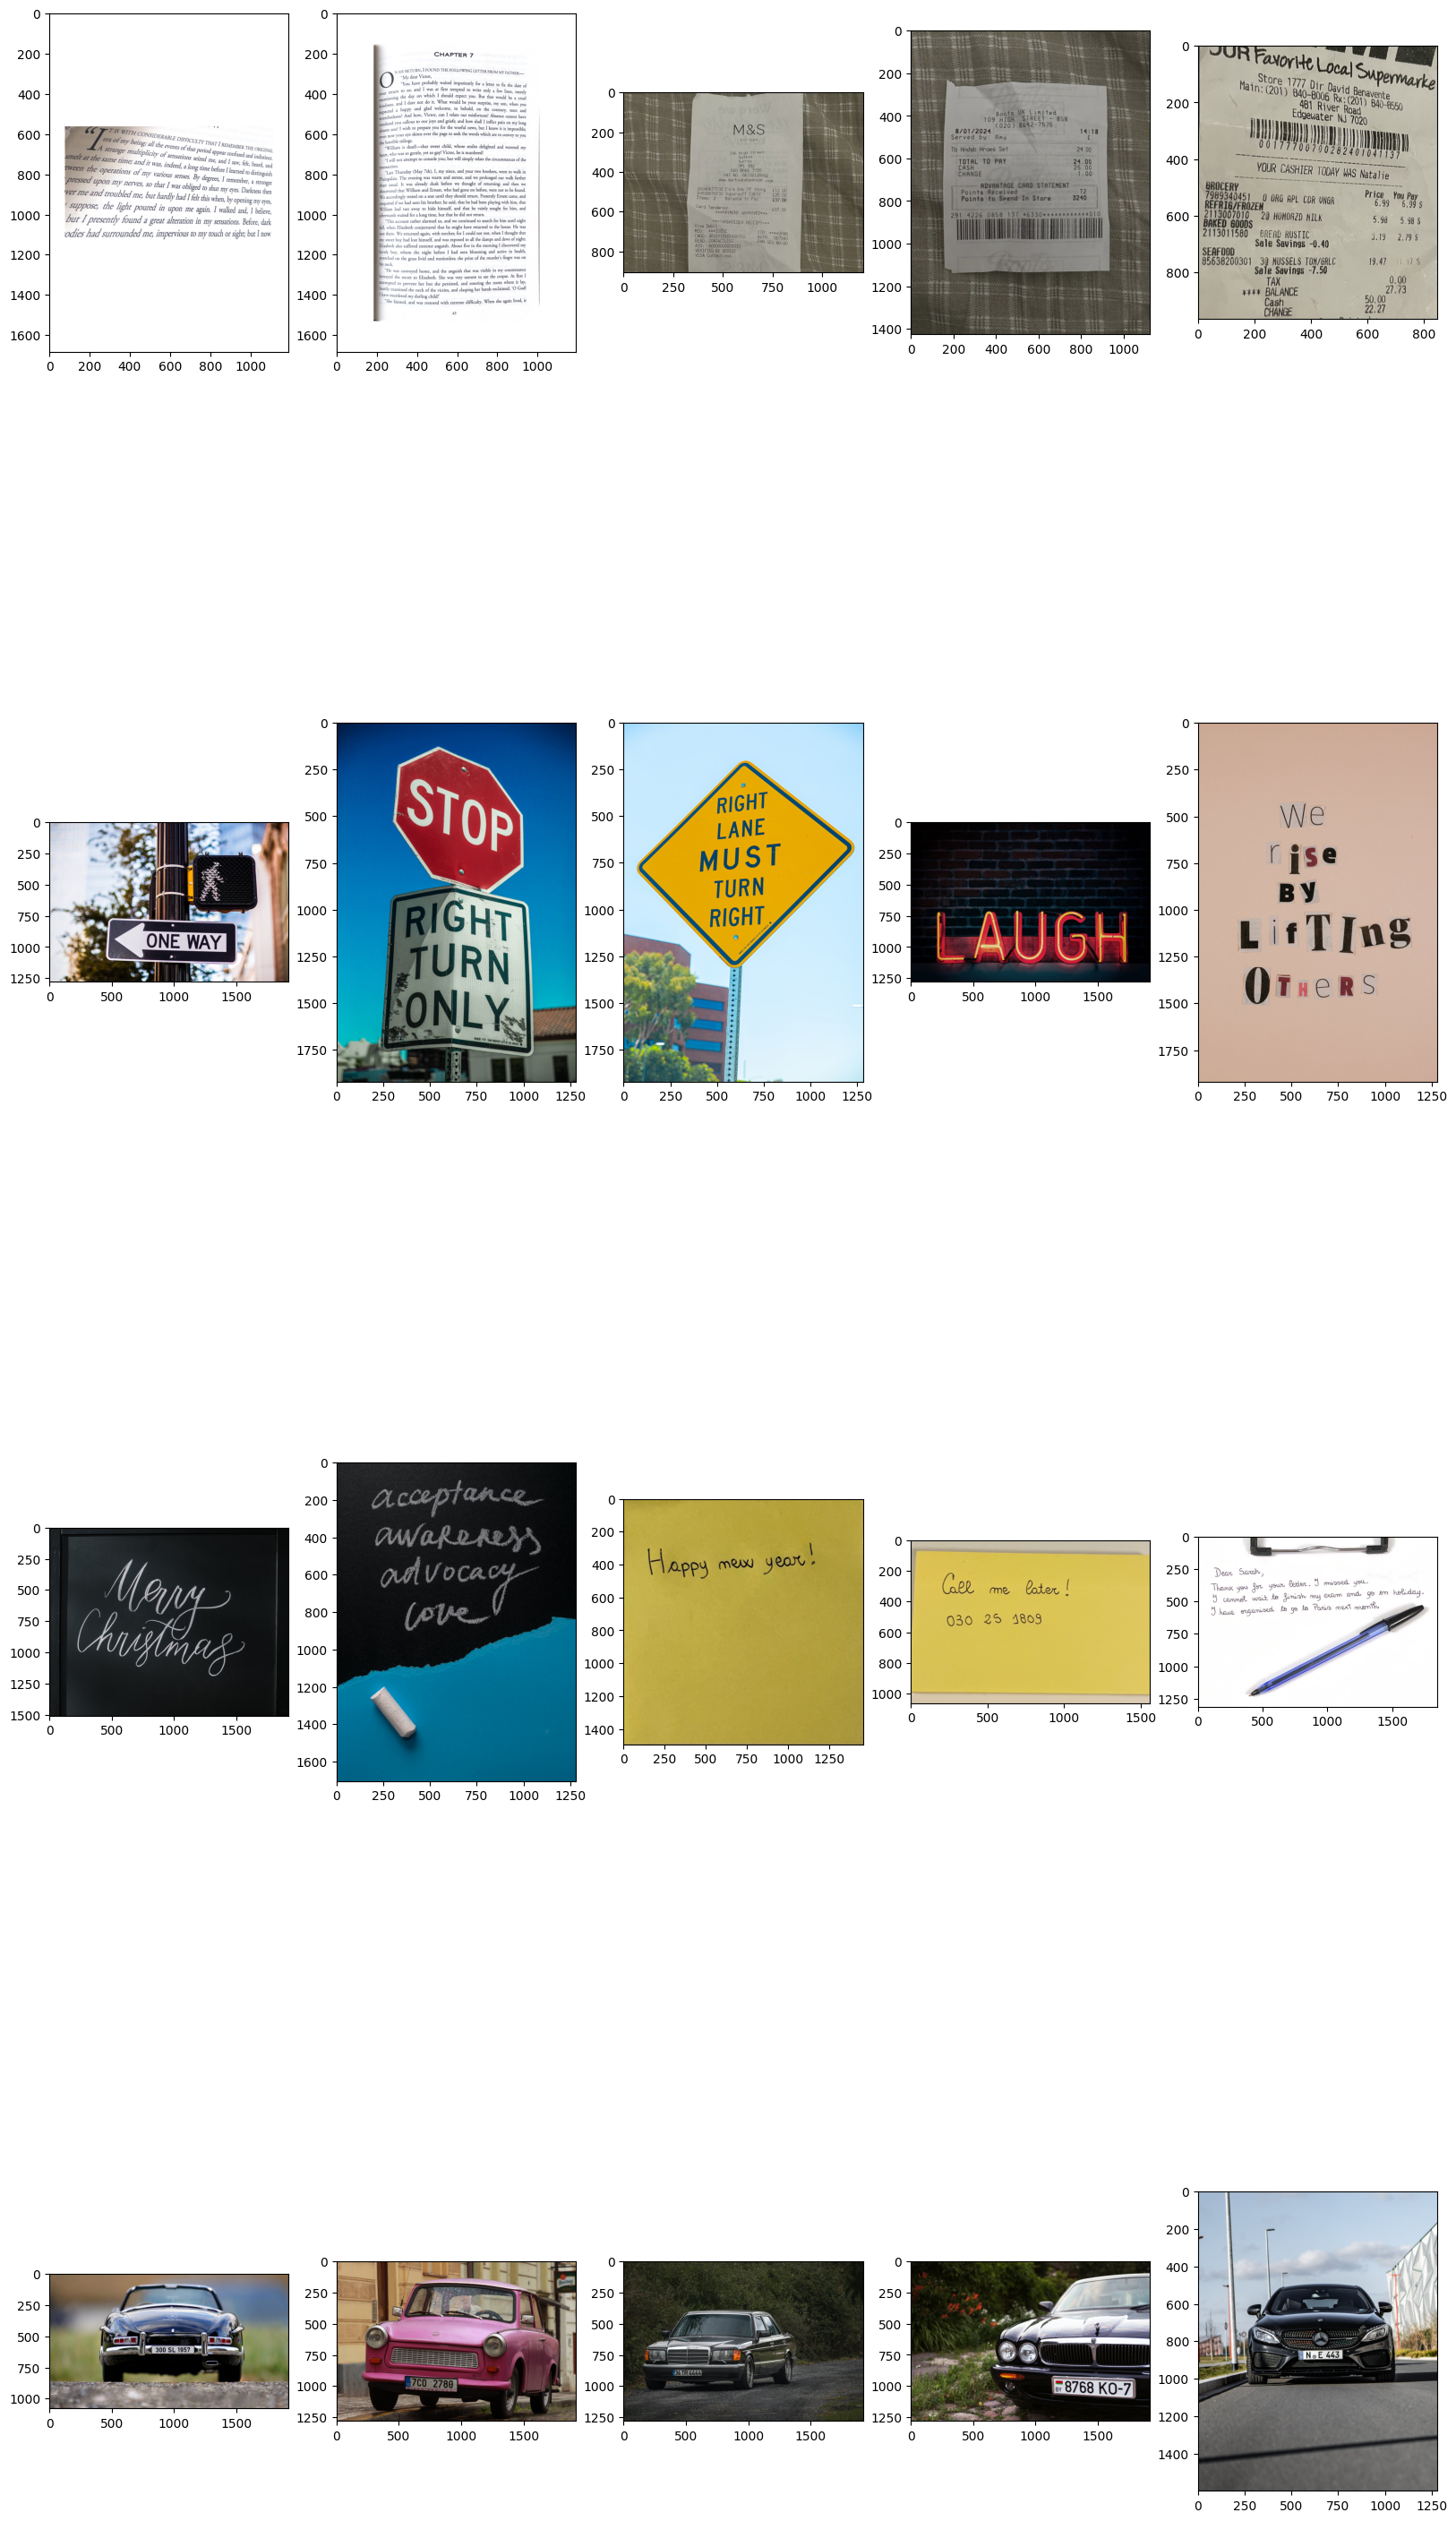

In [12]:
import cv2
import numpy as np

def image_transform(images, t_type, scale = False):
  transform_images = []
  images_scaled = []

  if scale:
    for img in images:
      images_scaled.append(resize_image(img, 25))
  else:
    images_scaled = images

  for img in images:
    if t_type == 'blur':
      image = cv2.blur(img, (7, 7))
    elif t_type == 'rotation':
      image = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    else:
      image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    transform_images.append(image)

  return transform_images

t_images = image_transform(images, 'gray') #rotation, blur o gray

visualize_images(images, False) #visualizza le immagini natural
#visualize_images(t_images, True) #visualizza le trasformazioni

# **Tesseract**


Tesseract necessita dell'installazione nel sistema operativo, successivamente è possibile installare la libreria Pytesseract che fornisce un'interfaccia Tesseract per il linguaggio Python.


In [9]:
! sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 32 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (8,155 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [10]:
!pip install pytesseract

In [12]:
import pytesseract
from PIL import Image
from matplotlib import cm

custom_config = r'--oem 3 --psm 6'


### Il riconoscimento ottico dei caratteri

Con Pytesseract viene estrapolato il testo presente in ogni immagine. Successivamente l'immagine viene convertita in un oggetto PIL.

In [13]:
from re import L

def ocr_on_tesseract(images, lang='eng'):
  pred_texts = []

  for image in images:
    testo_estratto = pytesseract.image_to_string(Image.fromarray(image), lang='eng')
    pred_texts.append(testo_estratto)

  return pred_texts


### Metriche di valutazione


La seguente funzione calcola i punteggi CER e WER dei risultati prodotti dal programma, prendendo in cosiderazione e confrontanto la lista dei testi predetti con la lista dei testi golden.

In [18]:
def calculate_scores(pred_texts, true_texts):
  scores_cer = [ fastwer.score_sent(pred_texts[i].lower(), true_texts[i].lower(), char_level=True) for i in range(len(pred_texts)) ]

  scores_wer = [ fastwer.score_sent(pred_texts[i].lower(), true_texts[i].lower()) for i in range(len(pred_texts)) ]

  return scores_cer, scores_wer

I risultati CER e WER vengono visualizzati in file .csv per categoria di immagine. Mostrano la trasformazione eseguita e i risultati ottenuti.  

In [19]:
def generate_csv(data_class, trans, cer, wer):
  d = {'augmentation': trans, 'cer': cer, 'wer': wer}
  df = pd.DataFrame(data=d)

  csv_name = data_class + '.csv'
  df.to_csv(csv_name, sep=',', index=False)
  return df

Viene definita una seconda funziona per l'implementazione dei file .csv contenenti il percorso dell'immagine, il testo golden e il testo predetto.

In [20]:
def generate_text_csv(csv_label, files_path, true_text, pred_texts):
  d = {'filename': files_path, 'true_text': true_text, 'pred_text': pred_texts}
  df = pd.DataFrame(data=d)
  csv_name = csv_label + '.csv'
  df.to_csv(csv_name, sep=',', index=False)
  return df

### Risultati

Ogni immagine all'interno di una categoria di immagini viene analizzata per ciascuna combinazione di qualità (high e low) e per ciascuna trasformazione (natural, blur, rotation, gray).  Se l'immagine è natural (originale, senza trasformazioni) e la qualità è low, allora l'immagine viene ridimensionata; se l'immagine è natural e high, viene presa l'immagine originale. Per quanto riguarda le trasformazioni, se il parametro è diverso da natural e la qualità è high, viene presa l'immagine originale con la trasformazione, altrimenti viene impostato il parametro scale per ottenere le immagini low quality.

In [21]:
labels = np.array(labels)
quality = ['high', 'low']
augmentation = ['natural', 'blur', 'rotation', 'gray']

for label in set(labels):
  print(label)
  class_index = np.where(labels==label)[0]
  test_images = []

  column_cer = []
  column_wer = []
  column_trans = []

  for q in quality:
    for a in augmentation:
      print(q+'-'+a)
      if a == 'natural' and q == 'low':
        test_images = [resize_image(x) for x in images[class_index]]
      elif a == 'natural' and q == 'high':
        test_images = images[class_index]

      if a != 'natural':
        if q == 'high':
          test_images = image_transform(images[class_index], a)
        else:
          test_images = image_transform(images[class_index], a, scale=True)

      pred_texts = ocr_on_tesseract(test_images)

      cer, wer = calculate_scores(pred_texts, true_texts[class_index])

      column_cer.append(round(np.mean(cer), 2))
      column_wer.append(round(np.mean(wer), 2))
      column_trans.append(str(q)+'-'+str(a))

      # genera un file .csv per ogni label e per ogni trasformazione
      # permette di visualizzare il testo predetto e il testo golden
      generate_text_csv(label+'-'+str(q)+'-'+str(a), images_path[class_index], true_texts[class_index], pred_texts) #NEW

  generate_csv(label, column_trans, column_cer, column_wer)

car_plates
high-natural
high-blur
high-rotation
high-gray
low-natural
low-blur
low-rotation
low-gray
handwritten_texts
high-natural
high-blur
high-rotation
high-gray
low-natural
low-blur
low-rotation
low-gray
unstructured_text
high-natural
high-blur
high-rotation
high-gray
low-natural
low-blur
low-rotation
low-gray
structured_text
high-natural
high-blur
high-rotation
high-gray
low-natural
low-blur
low-rotation
low-gray
